In [15]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [39]:
df['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [17]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


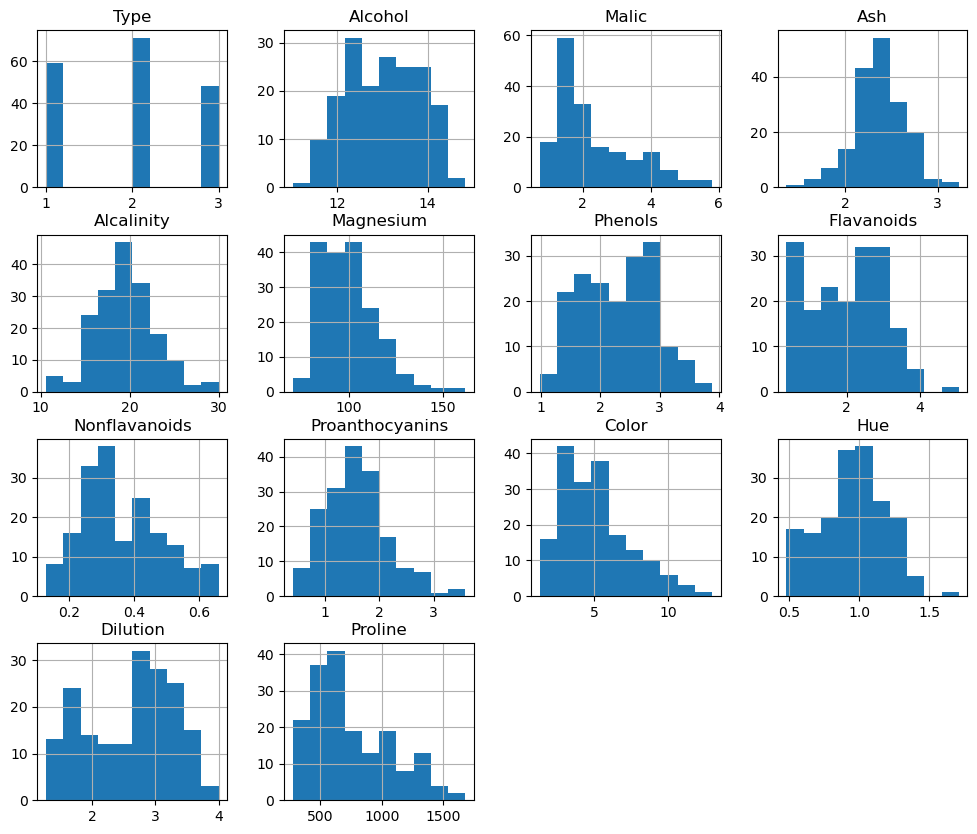

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(figsize=(12, 10))
plt.show()




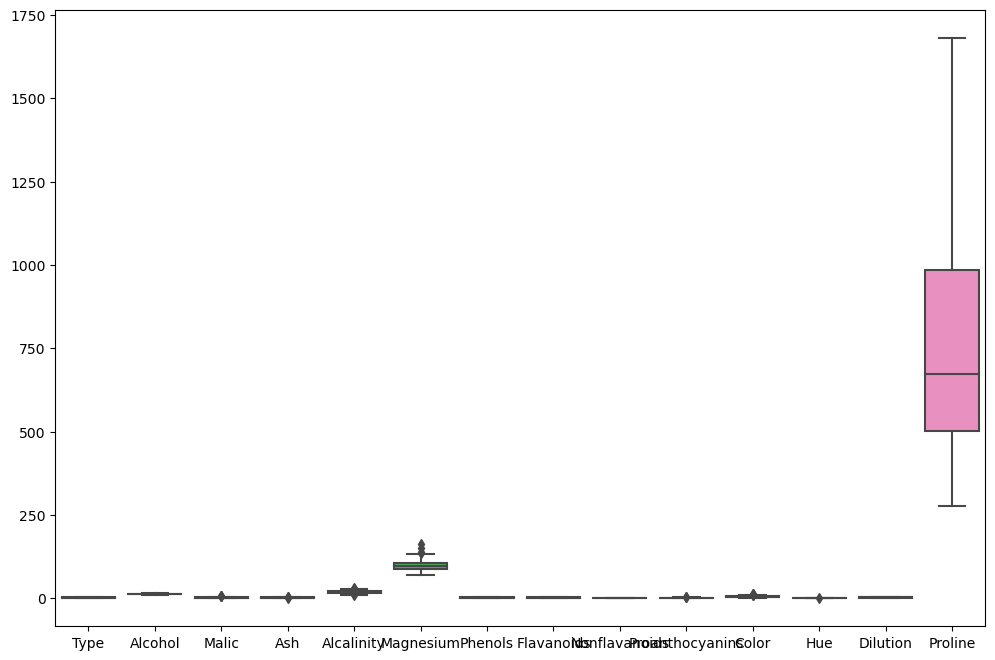

In [19]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.show()



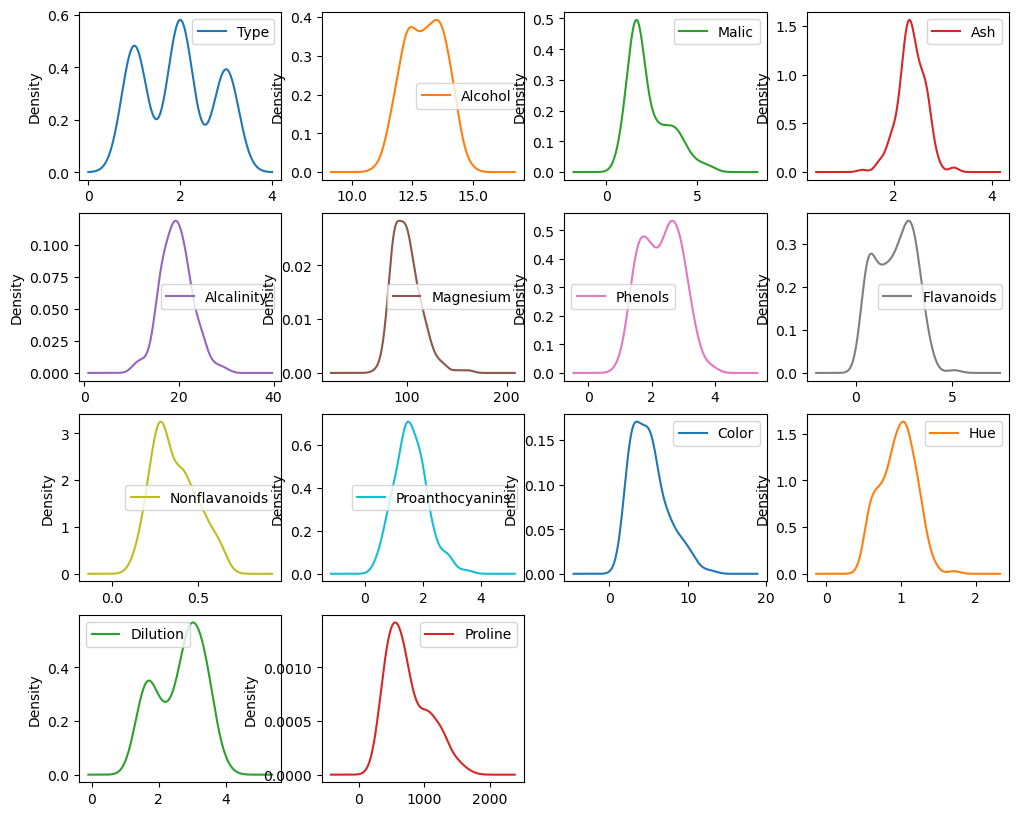

In [20]:
# Density plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(12, 10))
plt.show()

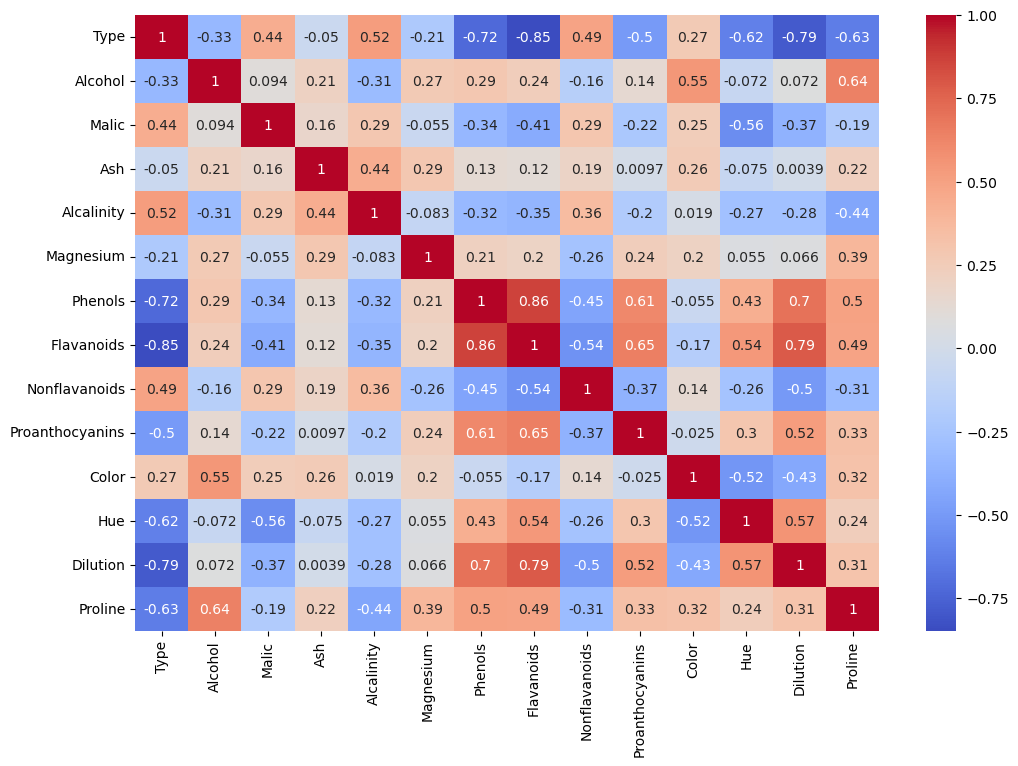

In [21]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


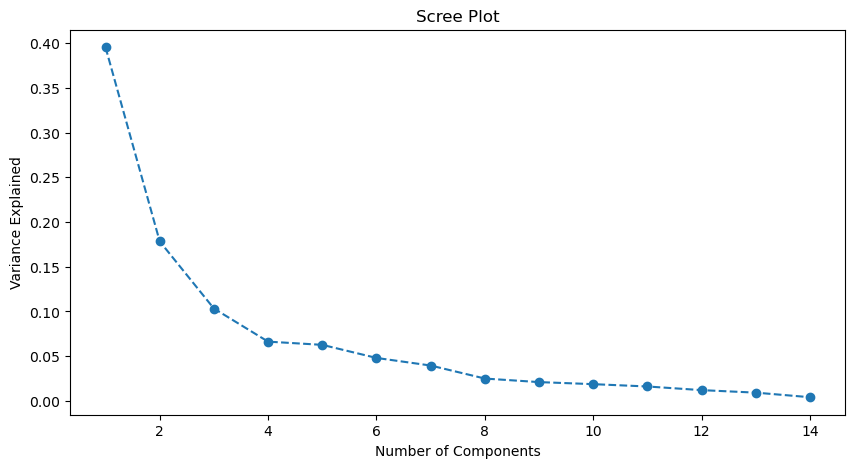

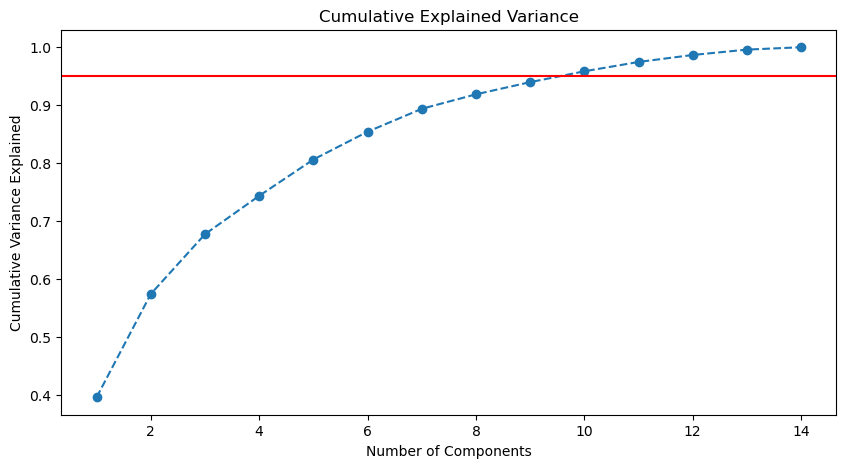

In [23]:
from sklearn.decomposition import PCA

# Implement PCA
pca = PCA()
pca.fit(scaled_df)

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.show()


In [24]:
# Choose the number of components (e.g., 2 for simplicity)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)


In [25]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)
df['Cluster'] = kmeans.labels_


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
kmeans.labels_

array([0, 4, 4, 0, 8, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 4, 4, 0, 4, 0, 4,
       4, 4, 4, 8, 4, 4, 4, 4, 4, 0, 4, 8, 4, 4, 4, 4, 4, 0, 0, 4, 0, 4,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 5, 6, 6, 5, 2, 6, 2,
       5, 5, 6, 7, 9, 2, 5, 8, 2, 5, 5, 6, 7, 2, 5, 5, 9, 1, 2, 5, 9, 9,
       9, 9, 9, 9, 9, 2, 2, 7, 7, 5, 2, 2, 5, 5, 2, 5, 5, 9, 5, 9, 2, 2,
       2, 2, 6, 9, 9, 9, 5, 2, 1, 2, 2, 8, 9, 2, 2, 2, 2, 9, 9, 9, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 3])

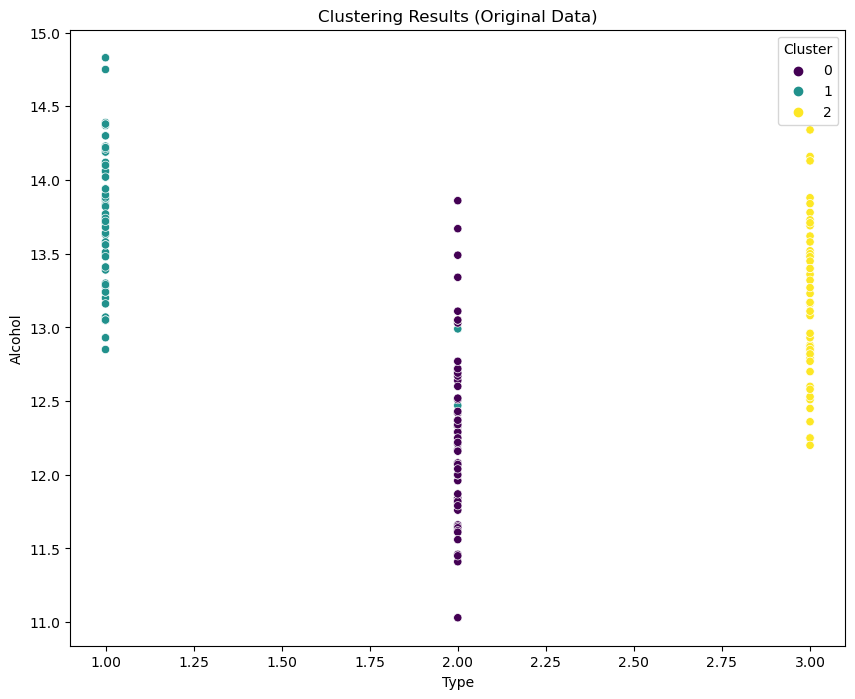

In [26]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Results (Original Data)')
plt.show()


In [35]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score
silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin index
db_index = davies_bouldin_score(scaled_df, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index}')


Silhouette Score: 0.14309288941597742
Davies-Bouldin Index: 1.7525052164527424


In [36]:
# Apply K-means clustering to PCA data
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(pca_df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_pca.labels_


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


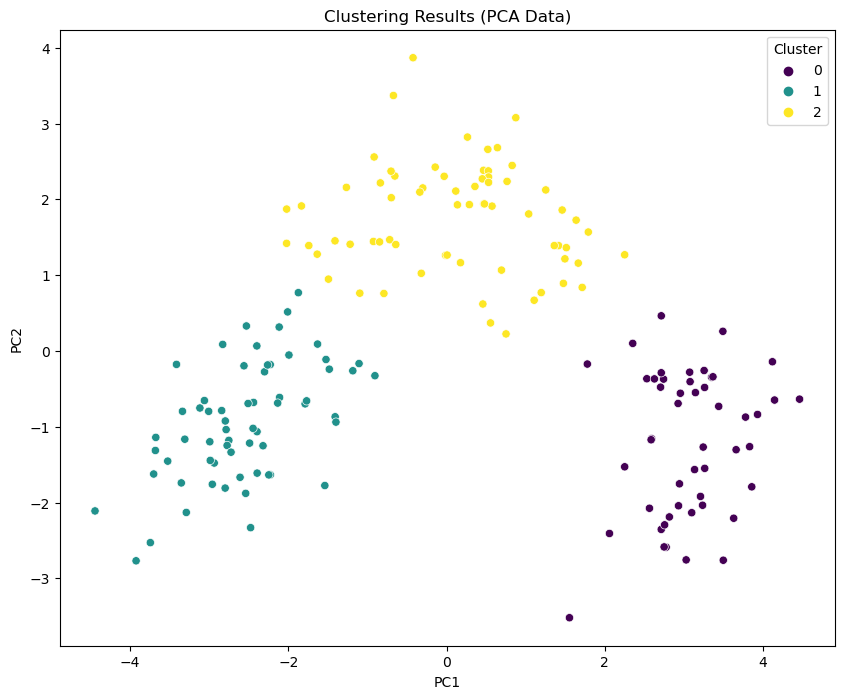

In [29]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clustering Results (PCA Data)')
plt.show()


In [30]:
# Silhouette score for PCA data
silhouette_avg_pca = silhouette_score(pca_df[['PC1', 'PC2']], kmeans_pca.labels_)
print(f'Silhouette Score (PCA Data): {silhouette_avg_pca}')

# Davies-Bouldin index for PCA data
db_index_pca = davies_bouldin_score(pca_df[['PC1', 'PC2']], kmeans_pca.labels_)
print(f'Davies-Bouldin Index (PCA Data): {db_index_pca}')


Silhouette Score (PCA Data): 0.6024415520362842
Davies-Bouldin Index (PCA Data): 0.5397078562575716


from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = wine.data

# Apply PCA
pca = PCA()
pca.fit(X)

# Calculate cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA')
plt.grid(True)
plt.show()
